<a href="https://colab.research.google.com/github/YichengZou626/COMP590_intro_to_deep_learning/blob/main/Homework_1_(Yicheng_Zou).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

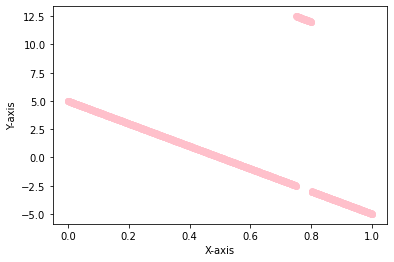

In [ ]:
x, y = generate_data()
plt.scatter(x, y, c ="pink")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

For the part of 0.75 < x < 0.8, it was the outlier as compared with the line of Y = -10X + 5

# 2. Implement linear regression (2 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

1000 finished
final loss is: 5.088520851384827
weight m is: -7.516173357311142
weight b is: 4.507688291865109


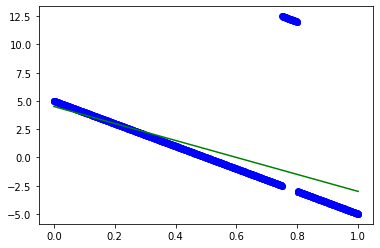

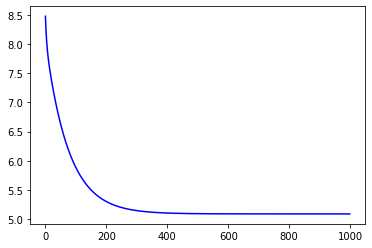

In [ ]:
class Linear_Regression:
    def __init__(self, X, Y, m, b):
      self.X = X
      self.Y = Y
      self.m = m
      self.b = b
     
    def grad_descent(self, learning_rate):
      Y_pred = self.predict()
      Y = self.Y
      M = len(Y)
      self.b = self.b - (learning_rate * ((1/M) * np.sum(Y_pred - Y)))
      self.m = self.m - (learning_rate * ((1/M) * np.sum((Y_pred - Y) * self.X)))
 
    def predict(self):
      Y_pred = (self.m * self.X) + self.b
      return Y_pred
     
    def loss_func(self, Y_pred):
      M = len(self.Y)
      J = (1/(2 * M))*(np.sum((Y_pred - self.Y)**2))
      return J
      
    def final_weight(self):
      return self.m, self.b

    def plot_best_fit(self, Y_pred, fig):
      f = plt.figure(fig)
      plt.scatter(self.X, self.Y, color='b')
      plt.plot(self.X, Y_pred, color='g')
      f.show()

 
def main():
    X, Y = generate_data()

    np.random.seed(12)
    m = np.random.randn()
    b = np.random.randn()
 
    regressor = Linear_Regression(X, Y, m, b)
 
    iterations = 0
    steps = 1000
    learning_rate = 0.1
    costs = []
 
    while 1:
        Y_pred = regressor.predict()
        cost = regressor.loss_func(Y_pred)
        costs.append(cost)
        regressor.grad_descent(learning_rate)
         
        iterations += 1
        if iterations == steps:
            print(iterations, "finished")
            m, b = regressor.final_weight()
            print('final loss is: ' + str(cost))
            print('weight m is: ' + str(m))
            print('weight b is: ' + str(b))
            regressor.plot_best_fit(Y_pred, 'comparison of two lines')
            break
  
    h = plt.figure('loss progress')
    plt.plot(range(iterations), costs, color='b')
    h.show()
 
if __name__ == '__main__':
    main()

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


After the training process, the final weight of m is -7.516173357311142 and b is 4.507688291865109. They are very far from the original weight of -10 and 5. The reason is that the L2 loss function is not robust, and it was affected by outliers in original data.

# 4. "Robust" linear regression (0.5 points)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

10000 finished
final loss is: 0.7531488918781838
weight m is: -10.001999293636194
weight b is: 4.993454120559883


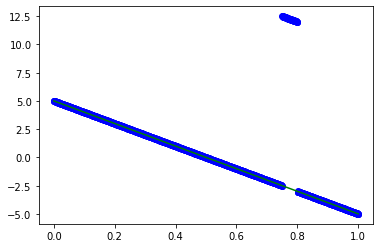

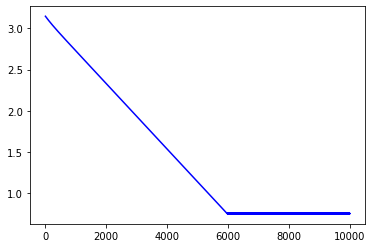

In [ ]:
class Linear_Regression:
    def __init__(self, X, Y, m, b):
      self.X = X
      self.Y = Y
      self.m = m
      self.b = b
     
    def grad_descent(self, learning_rate):
      Y_pred = self.predict()
      Y = self.Y
      M = len(Y)
      self.b = self.b - (learning_rate * ((1/ M) * np.sum((Y_pred - Y)/np.abs(Y_pred - Y))))
      self.m = self.m - (learning_rate * ((1/ M) * np.sum(((Y_pred - Y)/np.abs(Y_pred - Y)) * self.X)))
 
    def predict(self):
      Y_pred = self.b + (self.m * self.X)
      return Y_pred
     
    def loss_func(self, Y_pred):
      M = len(self.Y)
      J = (1 / M) * (np.sum(np.abs(Y_pred - self.Y)))
      return J
      
    def final_weight(self):
      return self.m, self.b

    def plot_best_fit(self, Y_pred, fig):
      f = plt.figure(fig)
      plt.scatter(self.X, self.Y, color='b')
      plt.plot(self.X, Y_pred, color='g')
      f.show()
 
def main():
    X, Y = generate_data()

    np.random.seed(12)
    m = np.random.randn()
    b = np.random.randn()
 
    regressor = Linear_Regression(X, Y, m, b)
 
    iterations = 0
    steps = 10000
    learning_rate = 0.01
    costs = []
 
    while 1:
        Y_pred = regressor.predict()
        cost = regressor.loss_func(Y_pred)
        costs.append(cost)
        regressor.grad_descent(learning_rate)
         
        iterations += 1
        if iterations == steps:
            print(iterations, "finished")
            m, b = regressor.final_weight()
            print('final loss is: ' + str(cost))
            print('weight m is: ' + str(m))
            print('weight b is: ' + str(b))
            regressor.plot_best_fit(Y_pred, 'comparison of two lines')
            break
  
    h = plt.figure('loss progress')
    plt.plot(range(iterations), costs, color='b')
    h.show()
 
if __name__ == '__main__':
    main()

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

After the training process, the final weight of m is *-10.001999293636194* and b is 4.993454120559883. They are very close to the original weight of -10 and 5. The reason for the different behavior for L1 and L2 loss function is that L1 loss function is more robust and is generally not affected by outliers. On the contrary L2 loss function will try to adjust the model according to these outlier values, and so L2 loss function is highly sensitive to outliers in the dataset.


# Acknowledge:
**In this assignment, I cooperate with Hanqi Hua to write code. Also, some part of my code was adapted from https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/.**